# **1. Introducción a la Clasificación**

## Entrenamiento y prueba de un modelo de clasificación

In [1]:
""" Features
      1 = Sí
      0 = No

        - Tiene el pelo largo?
        - Tiene las uñas afiladas?
        - Hace miau?
"""

perro1 = [0,1,1]
perro2 = [1,0,1]
perro3 = [1,1,1]

gato1 = [0,1,0]
gato2 = [0,1,1]
gato3 = [1,1,0]

# Estandarización de nombres para entrenamiento
x_train = [perro1, perro2, perro3, gato1, gato2, gato3]
y_train = [1,1,1,0,0,0]

In [2]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual = 'auto')
model.fit(x_train, y_train)

LinearSVC(dual='auto')

In [3]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [4]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

# Estandarización de nombres para entrenamiento
x_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

In [5]:
previsiones = model.predict(x_test)
previsiones

array([1, 0, 1])

In [6]:
correctos = (previsiones==y_test).sum()
total = len(x_test)
tasa_de_acierto = correctos/total
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

La tasa de acierto fue de: 33.33%


In [7]:
from sklearn.metrics import accuracy_score

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

La tasa de acierto fue de: 33.33%


# **2. Lectura y manipulación de datos**

In [8]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,home,how_it_works,contact,bought
95,1,1,1,1
62,0,0,1,0
11,1,0,1,1
72,0,0,1,0
9,1,0,1,1


In [9]:
mapa = {
          'home':'principal',
          'how_it_works':'como_funciona',
          'contact':'contacto',
          'bought':'compro'
        }

datos = datos.rename(columns = mapa)

datos.sample(3)

,principal,como_funciona,contacto,compro
66,0,0,1,0
4,1,1,0,0
16,0,0,1,0


In [10]:
x = datos [['principal', 'como_funciona', 'contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [11]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [12]:
datos.shape

(99, 4)

In [13]:
x_train = x[:75]
y_train = y[:75]

x_test = x[75:]
y_test = y[75:]

print('Entrenaremos con {} elementos y probaremos con {} elementos'.format((len(x_train)),(len(x_test))))

Entrenaremos con 75 elementos y probaremos con 24 elementos


In [14]:
y_train.value_counts()

compro
0    48
1    27
Name: count, dtype: int64

In [15]:
27/75

0.36

In [16]:
y_test.value_counts()

compro
0    18
1     6
Name: count, dtype: int64

In [17]:
6/24

0.25

In [18]:
model = LinearSVC(dual = 'auto')
model.fit(x_train, y_train)

previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

La tasa de acierto fue de: 95.83%


In [19]:
from sklearn.model_selection import train_test_split

SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED)

model = LinearSVC(dual = 'auto')
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

La tasa de acierto fue de: 96.0%


In [20]:
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify = y)

model = LinearSVC(dual = 'auto')
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

La tasa de acierto fue de: 96.0%


In [21]:
y_train.value_counts()

compro
0    49
1    25
Name: count, dtype: int64

In [22]:
25/74

0.33783783783783783

In [23]:
y_test.value_counts()

compro
0    17
1     8
Name: count, dtype: int64

In [24]:
8/25

0.32

# **3. Modelo baseline**

In [25]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,unfinished,expected_hours,price
703,0,62,618
1827,0,51,1089
361,1,81,6958
1312,0,54,1665
638,0,49,326


In [26]:
mapa = {
        'unfinished':'inconcluso',
        'expected_hours':'horas_esperadas',
        'price':'precio'
        }

datos = datos.rename(columns = mapa)

datos.sample(5)

,inconcluso,horas_esperadas,precio
1631,0,86,10638
1396,0,44,695
1397,0,8,292
1991,0,52,1379
158,1,1,196


In [27]:
cambio = {1:0, 0:1}

datos['finalizado'] = datos.inconcluso.map(cambio)

In [28]:
datos.sample(5)

,inconcluso,horas_esperadas,precio,finalizado
1870,0,33,400,1
1301,0,74,6495,1
305,0,61,695,1
387,1,31,154,0
972,1,63,1440,0


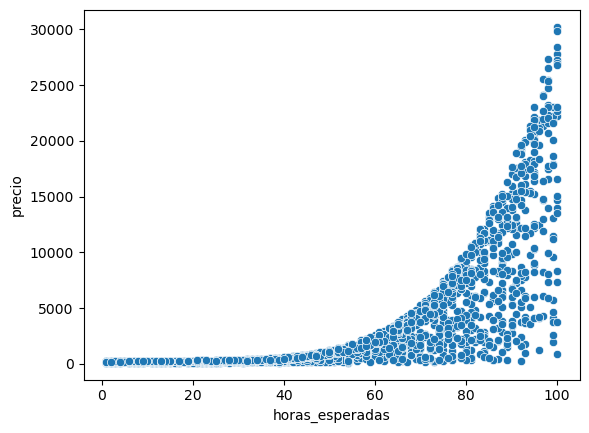

In [29]:
import seaborn as sns

sns.scatterplot(x = 'horas_esperadas', y = 'precio', data = datos);

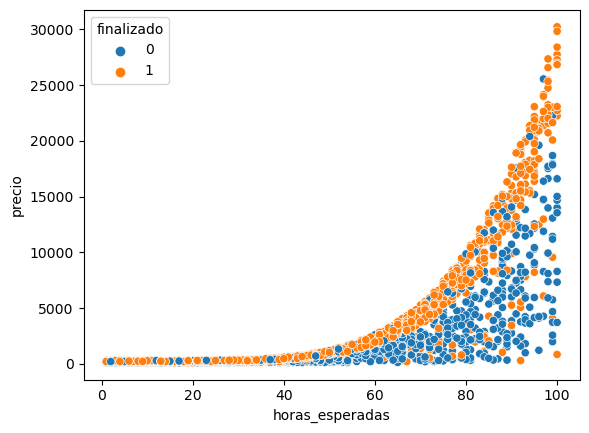

In [30]:
sns.scatterplot(x = 'horas_esperadas', y = 'precio', data = datos, hue = 'finalizado');

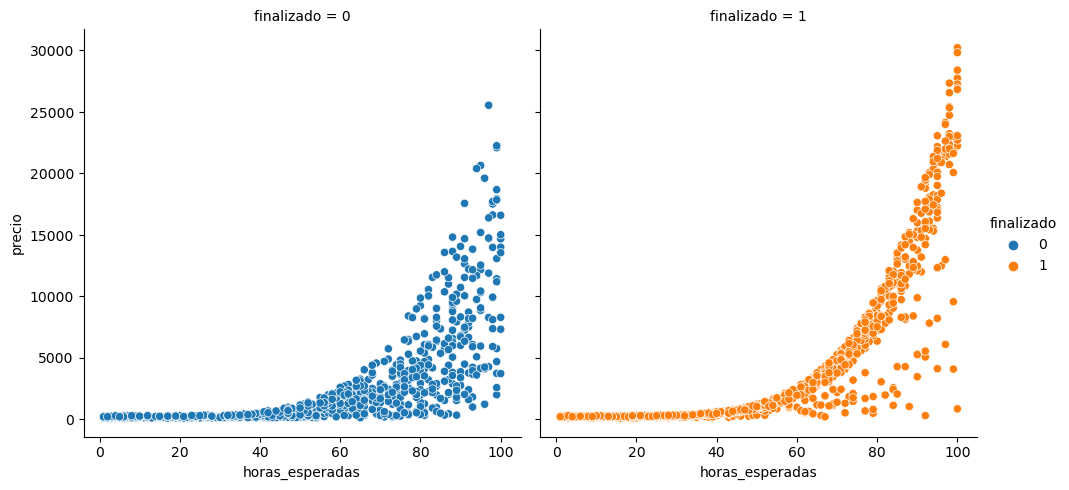

In [31]:
sns.relplot(x = 'horas_esperadas', y = 'precio', data = datos, hue = 'finalizado', col = 'finalizado');

In [32]:
import numpy as np

x = datos[['horas_esperadas','precio']]
y = datos.finalizado

np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Entrenaremos con {} elementos y probaremos con {} elementos'.format((len(x_train)),(len(x_test))))

model = LinearSVC(dual = 'auto')
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

Entrenaremos con 1617 elementos y probaremos con 540 elementos
La tasa de acierto fue de: 57.78%


In [33]:
# Algoritmo de base

base_prevision = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_prevision)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

La tasa de acierto fue de: 52.59%


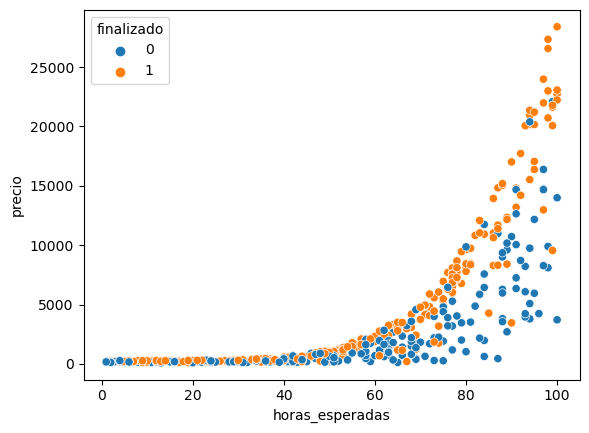

In [34]:
sns.scatterplot(x='horas_esperadas', y='precio', hue = y_test, data = x_test);

In [35]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [36]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [37]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [38]:
Z = model.predict(puntos)

C:\Users\Julio\miniconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [39]:
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

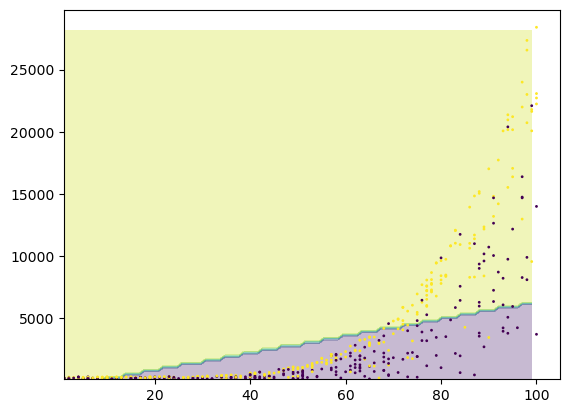

In [40]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1);

# **4. Estimadores no lineales**

Entrenaremos con 1617 elementos y probaremos con 540 elementos
La tasa de acierto fue de: 67.78%


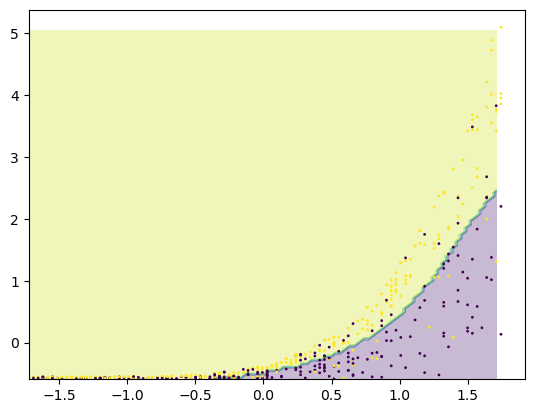

In [41]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# Siempre debemos usar escalador salvo que se trabaje con árboles de decisión

x = datos[['horas_esperadas','precio']]
y = datos.finalizado

np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Entrenaremos con {} elementos y probaremos con {} elementos'.format((len(x_train)),(len(x_test))))

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

data_x = x_test[:,0]
data_y = x_test[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(puntos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c=y_test, s=1);

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

# **5. Dummy Clasifiers y árboles de decisión**

In [42]:
uri = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'
datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [43]:
mapa = {
        'mileage_per_year' : 'millas_por_ano',
        'model_year' : 'ano_del_modelo',
        'price' : 'precio',
        'sold' : 'vendido'
        }

datos = datos.rename(columns = mapa)
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
4062,4062,12914,2001,91492.55,no
338,338,13175,2002,77450.66,no
7900,7900,9524,2004,70029.90,no


In [44]:
cambio = {'no':0,'yes':1}

datos.vendido = datos.vendido.map(cambio)
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
7825,7825,11850,2006,54526.09,0
1339,1339,7848,2003,66631.71,1
1685,1685,21406,2007,44578.12,1


In [45]:
from datetime import datetime

ano_actual = datetime.today().year
datos['edad_del_modelo'] = ano_actual - datos.ano_del_modelo
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo
8290,8290,14255,2005,51606.00,1,19
8686,8686,21236,2006,37042.17,1,18
5642,5642,9998,2011,47241.59,1,13


In [46]:
datos['km_por_ano'] = (datos.millas_por_ano * 1.60934)
datos.sample(3)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo,km_por_ano
100,100,17000,2002,45343.51,1,22,27358.78000
5228,5228,15933,2000,61608.05,0,24,25641.61422
3569,3569,13512,2000,39647.42,1,24,21745.40208


In [47]:
datos = datos.drop(columns = ['Unnamed: 0', 'millas_por_ano', 'ano_del_modelo'], axis = 1)
datos.sample(3)

,precio,vendido,edad_del_modelo,km_por_ano
689,47870.87,1,17,43307.33940
4978,35042.75,1,11,25730.12792
3483,39458.06,1,13,20506.21028


In [48]:
x = datos[['edad_del_modelo','km_por_ano','precio']]
y = datos.vendido

np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Entrenaremos con {} elementos y probaremos con {} elementos'.format((len(raw_x_train)),(len(raw_x_test))))

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

Entrenaremos con 7500 elementos y probaremos con 2500 elementos
La tasa de acierto fue de: 76.04%


In [49]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(x_train, y_train)

exactitud = dummy.score(x_test, y_test)*100
print('La exactitud del clasificador Dummy Stratified fue: {}%'.format(round(exactitud,2)))

La exactitud del clasificador Dummy Stratified fue: 52.64%


In [50]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(x_train, y_train)

exactitud = dummy.score(x_test, y_test)*100
print('La exactitud del clasificador Dummy Most Frequent fue: {}%'.format(round(exactitud,2)))

La exactitud del clasificador Dummy Most Frequent fue: 58.0%


## Árbol de Decisión

In [51]:
# Usando Standard Scaler

from sklearn.tree import DecisionTreeClassifier

x = datos[['edad_del_modelo','km_por_ano','precio']]
y = datos.vendido

np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Entrenaremos con {} elementos y probaremos con {} elementos'.format((len(raw_x_train)),(len(raw_x_test))))

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

Entrenaremos con 7500 elementos y probaremos con 2500 elementos
La tasa de acierto fue de: 78.04%


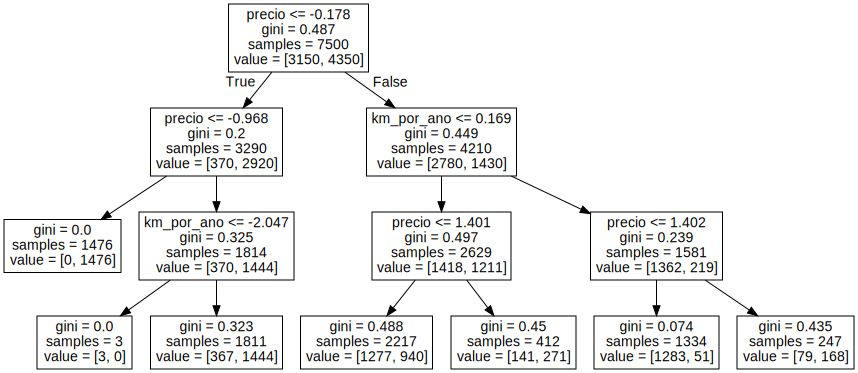

In [52]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names = features)
grafico = graphviz.Source(dot_data)
grafico

In [53]:
# Con datos sin estandarizar

from sklearn.tree import DecisionTreeClassifier

x = datos[['edad_del_modelo','km_por_ano','precio']]
y = datos.vendido

np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Entrenaremos con {} elementos y probaremos con {} elementos'.format((len(x_train)),(len(x_test))))

model = DecisionTreeClassifier(max_depth = 3)
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print("La tasa de acierto fue de: {}%".format(round(tasa_de_acierto*100,2)))

Entrenaremos con 7500 elementos y probaremos con 2500 elementos
La tasa de acierto fue de: 78.04%


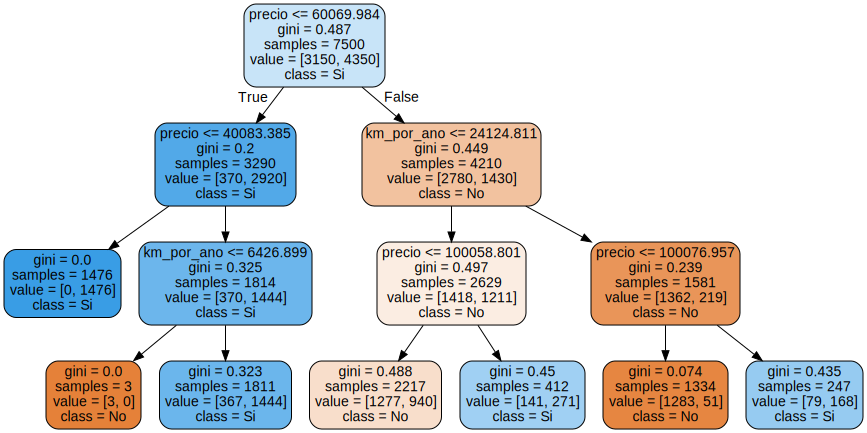

In [54]:
features = x.columns
dot_data = export_graphviz(model, feature_names = features, filled = True, rounded = True, class_names = ['No', 'Si'])
grafico = graphviz.Source(dot_data)
grafico